<a href="https://colab.research.google.com/github/iam-sriram8/Netflix-and-IMDb-ratings/blob/main/vedic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project8/NetflixOriginals.csv


In [ ]:
import seaborn as sns
import scipy.stats

In [ ]:
nf = pd.read_csv("../input/project8/NetflixOriginals.csv")
nf.head()

Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi

In [ ]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Text(0.5, 1.0, 'IMDB Score Distribution')

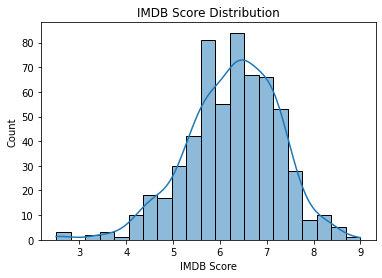

In [ ]:
sns.histplot(data=nf, x="IMDB Score", kde=True).set_title('IMDB Score Distribution')

In [ ]:
print(nf.Genre.nunique())
nf.Genre.unique()

115


array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [ ]:
nf[~nf.Genre.str.contains('/')].Genre.nunique()

79

In [ ]:
print(nf.Language.nunique())
nf.Language.unique()

38


array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [ ]:
nf[~nf.Language.str.contains('/')].Language.nunique()

22

Data Pre-Processing

In [ ]:
def scoreing_clf(score):
    if score<5:
        return ("Low")
    elif score<=5 and score<=7 :
        return ("Middle")
    elif score>=7:
        return ("High")
    
nf["scoreRange"] = nf["IMDB Score"].apply(scoreing_clf)

In [ ]:
genre_score = nf[["Genre", "IMDB Score", "scoreRange"]]
genre_count = genre_score.groupby("Genre").count()["IMDB Score"].rename("count").sort_values(ascending=False).reset_index()

In [ ]:
genre_score = nf[["Genre", "IMDB Score", "scoreRange"]]
genre_count = genre_score.groupby("Genre").count()["IMDB Score"].rename("count").sort_values(ascending=False).reset_index()

In [ ]:
language_score = nf[["Language", "IMDB Score", "scoreRange"]]
language_count = language_score.groupby("Language").count()["IMDB Score"].rename("count").sort_values(ascending=False).reset_index()

In [ ]:
runtime_score = nf[["Runtime", "IMDB Score", "scoreRange"]]

Question #1: Is there an Association between Genre and IMDB Score Range?
Test: Chi-square test.
Null Hypothesis  
H
0
 : The IMDB Score Range is independent of Genre.
Alternative Hypothesis  
H
1
 : The IMDB Score Range is associated with Genre.
Use α = 0.05

In [ ]:
cont_table  = pd.crosstab(genre_score.Genre, genre_score.scoreRange)
cont_table

scoreRange                            High  Low  Middle
Genre                                                  
Action                                   0    3       0
Action comedy                            0    1       0
Action-adventure                         1    0       0
Action-thriller                          1    0       1
Aftershow / Interview                    4    0       0
Animation                                3    0       0
Animation / Comedy                       1    0       0
Animation / Science Fiction              1    0       0
Animation / Short                        2    0       0
Animation/Christmas/Comedy/Adventure     1    0       0
Animation/Superhero                      0    1       0
Anime / Short                            0    1       0
Anthology/Dark comedy                    1    0       0
Biopic                                   2    0       0
Christmas/Fantasy/Adventure/Comedy       1    0       0
Comedy                                   2   11       1
Comedy-drama                             1    0       0
Coming-of-age comedy-drama               1    0       0
Concert Film                             5    0       0
Crime drama                              5    0       0
Documentary                             89    6       0
Drama                                   15    4       1
Drama-Comedy                             1    0       0
Family film                              0    1       0
Heist                                    0    1       0
Heist film/Thriller                      0    1       0
Historical drama                         1    0       0
Horror                                   0    3       0
Horror anthology                         0    1       0
Horror thriller                          0    2       0
Making-of                                2    0       0
Mentalism special                        1    0       0
Musical / Short                          1    0       0
Musical/Western/Fantasy                  0    1       0
Mystery                                  0    1       0
One-man show                             2    0       0
Political thriller                       0    1       0
Psychological thriller                   1    0       0
Romance drama                            0    1       0
Romantic comedy                          2    2       1
Science fiction/Drama                    0    2       0
Superhero                                0    1       0
Superhero-Comedy                         0    1       0
Thriller                                 1    7       1
Variety show                             1    0       0
War                                      1    0       0
War drama                                1    0       0
Western                                  1    1       0

In [ ]:
X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 174.27856341837375, P-Value: 9.560209781102008e-07


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that IMDB Score Range is associated with genre.

Question #2: Does IMDB Score for Films Differ by Genre?
Test: ANOVA
Test Statistic: Mean IMDB score of Genres containing more than 20 films.
Null Hypothesis  
H
0
 : The Genres' mean scores are equal.
Alternative Hypothesis  
H
1
 : At least one of the Genres' mean scores differ.
Use α = 0.05

In [ ]:
genre_count.query("count>20")

Genre  count
0      Documentary    159
1            Drama     77
2           Comedy     49
3  Romantic comedy     39
4         Thriller     33

In [ ]:
# Test for equality of variance
scipy.stats.levene(genre_score.query("Genre=='Documentary'")["IMDB Score"],
                   genre_score.query("Genre=='Drama'")["IMDB Score"],
                   genre_score.query("Genre=='Comedy'")["IMDB Score"],
                   genre_score.query("Genre=='Romantic comedy'")["IMDB Score"],
                   genre_score.query("Genre=='Thriller'")["IMDB Score"],
                   center='mean')

LeveneResult(statistic=1.0366812507951546, pvalue=0.3881518679950263)

Since p-value in LeveneResult is greater than the 0.05, the variance are equal.

In [ ]:
# Run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(genre_score.query("Genre=='Documentary'")["IMDB Score"],
                                            genre_score.query("Genre=='Drama'")["IMDB Score"],
                                            genre_score.query("Genre=='Comedy'")["IMDB Score"],
                                            genre_score.query("Genre=='Romantic comedy'")["IMDB Score"],
                                            genre_score.query("Genre=='Thriller'")["IMDB Score"])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 46.2114746272156, P-Value: 3.3694045569739407e-31


Question #5: Is IMDB Score for Films correlated with Runtime?
Test: Pearson correlation test.
Null Hypothesis  
H
0
 : IMDB score for films is not correlated with runtime.
Alternative Hypothesis  
H
1
 : IMDB score for films is correlated with runtime.
Use α = 0.05

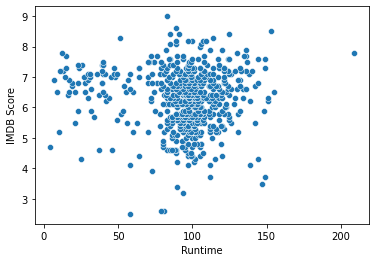

In [ ]:
ax = sns.scatterplot(x="Runtime", y="IMDB Score", data=runtime_score)

In [ ]:
r, p_value = scipy.stats.pearsonr(runtime_score['Runtime'], runtime_score['IMDB Score']) 
print("Pearson’s correlation coefficient: {0}, P-Value: {1}".format(r,p_value))

Pearson’s correlation coefficient: -0.0408962914207887, P-Value: 0.32383932911461244


Conclusion: Since the two-tailed p-value is greater than 0.05, we cannot reject the null hypothesis and conclude that there does not exist a relationship between runtime and teaching IMDB score.